# Previsão de séries temporais com Prophet em Python

## Bibliotecas e Configurações

In [ ]:
!pip3 install fbprophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from numpy.random import seed as S
#import random
#from random import seed as SS

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_plotly, plot_components_plotly

from sklearn.metrics import mean_absolute_error

In [ ]:
import seaborn as sns

sns.set(font_scale=1.4)
sns.set_style({'font.family': 'serif','fontname': 'Times New Roman'})

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  if np.any(y_true==0)==True:
    print('Erro: y_true contêm zeros!')
    return np.inf
  else:
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Gerar série temporal

In [ ]:
def Brownian_1D_IntRuido(T):
    #Integração do ruído gaussiano;
    mu,sigma = 0,1
    G=np.random.normal(mu,sigma,T)
    return np.cumsum(G)

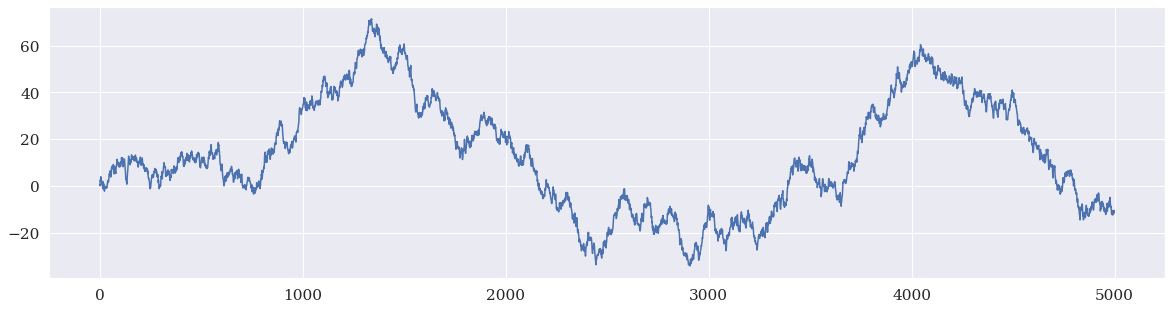

In [ ]:
S(5); T=5000
B=Brownian_1D_IntRuido(T)

plt.figure(figsize=(20,5))
plt.plot(B)
plt.show()

In [ ]:
Serie=B; Freq='D'
ds=pd.date_range('2000-01-01', periods=len(Serie), freq=Freq)
df = pd.DataFrame({'ds':ds, 'y':Serie}) 

df

,ds,y
0,2000-01-01,0.441227
1,2000-01-02,0.110357
2,2000-01-03,2.541129
3,2000-01-04,2.289036
4,2000-01-05,2.398646
...,...,...
4995,2013-09-04,-10.841012
4996,2013-09-05,-10.458047
4997,2013-09-06,-10.941273
4998,2013-09-07,-11.444065


## Modelo de previsão e Resultados

In [ ]:
#Separar dados de treino e teste:
N=300
train = df.drop(df.index[-N:])
test  = df.loc[df.index[-N:]]

print(train.shape, test.shape)

(4700, 2) (300, 2)


O parâmetro _changepoint_prior_scale_ é definido como 0,05 por padrão. Aumentar seu valor torna a tendência mais flexível e reduz o underfitting, sob o risco de overfitting.
Por padrão, os pontos de mudança são inferidos apenas para os primeiros 80% da série temporal (changepoint_range=0.8), a fim de ter bastante pista para projetar a tendência para a frente e evitar flutuações de sobreajuste no final da série temporal.

In [ ]:
%%time
model = Prophet(changepoint_prior_scale=0.7,changepoint_range=0.9)
model.fit(train)
future = model.make_future_dataframe(periods=len(test), freq=Freq)
forecast = model.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CPU times: user 22.1 s, sys: 4.82 s, total: 26.9 s
Wall time: 22.7 s


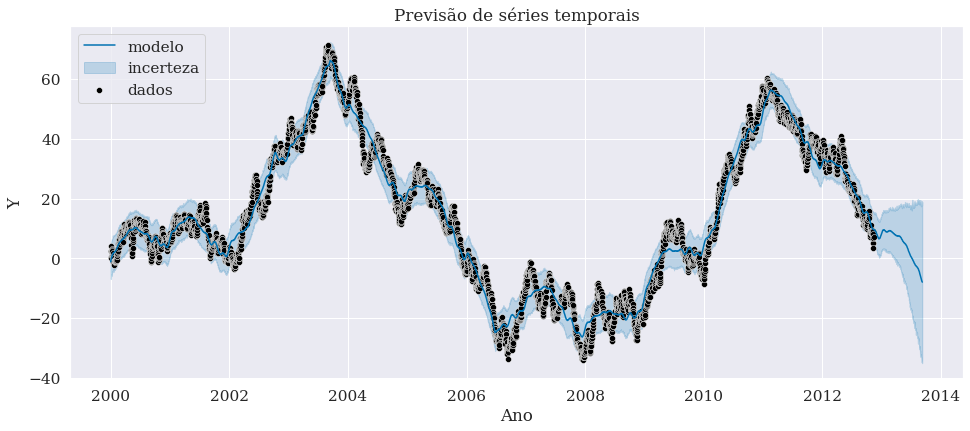

In [ ]:
plt.figure(figsize=(16,6.5))
Xlabel='Ano'; Ylabel='Y'

plt.fill_between(forecast.ds.values, forecast.yhat_lower.values, forecast.yhat_upper.values,
                 color='#0072B2', alpha=0.2, label='incerteza')

sns.scatterplot(data=train, x='ds', y='y', color='black', label='dados')

sns.lineplot(data=forecast, x='ds', y='yhat', linewidth=1.5, color='#0072B2', label='modelo')
plt.legend(loc='upper left')
#plt.legend(loc='lower right')
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
plt.title('Previsão de séries temporais')
plt.show()

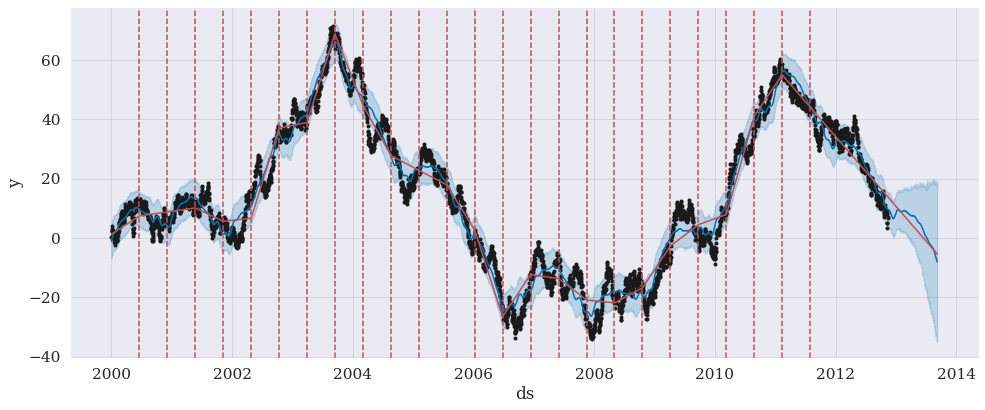

In [ ]:
#Pontos de mudança de tendência:
fig = model.plot(forecast,figsize=(14,6))
a=add_changepoints_to_plot(fig.gca(),model,forecast)

In [ ]:
plot_plotly(model, forecast)

## Avaliando o erro:

In [ ]:
y_true = test['y'].values
y_pred = forecast['yhat'][-N:].values
mae  = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

#print(f'MAE:  {round(mae,2)}')
print(f'MAPE: {round(mape,2)}%')

MAPE: 379.73%


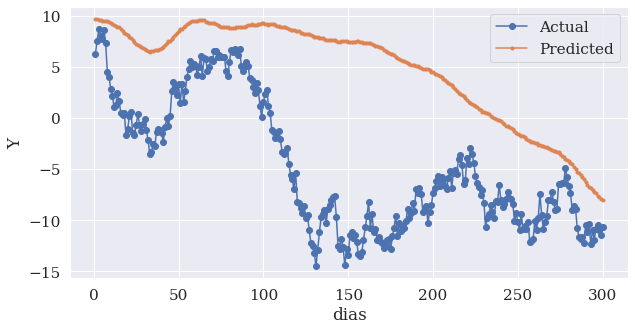

In [ ]:
# plot expected vs actual
plt.figure(figsize=(10,5))
x=np.arange(1,len(y_true)+1,1)
plt.plot(x,y_true,'o-', label='Actual')
plt.plot(x,y_pred,'.-', label='Predicted')
plt.ylabel(Ylabel)
plt.xlabel('dias')
plt.legend()
plt.show()

## Componentes da previsão:
Tendência e sazonalidades semanal e anual da série temporal

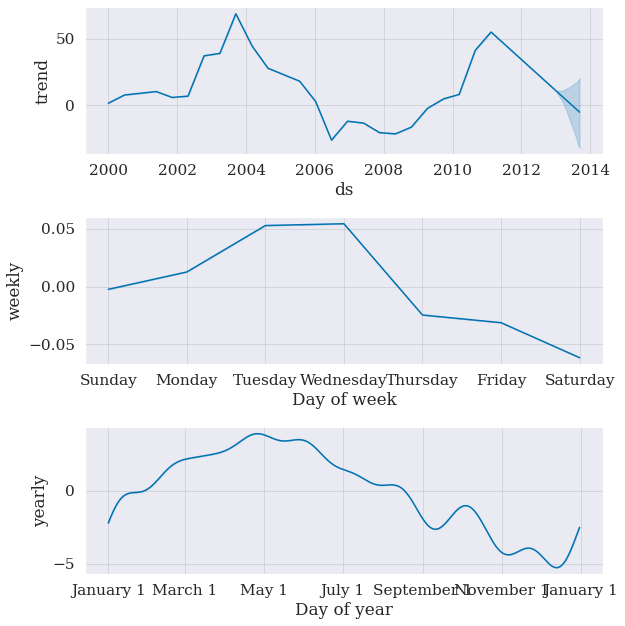

In [ ]:
model.plot_components(forecast)
plt.show()

In [ ]:
plot_components_plotly(model, forecast)

_________________
_________________